---
title: Code for Week 7 Class
author: DS101A Teaching team
---

Installing the `ucimlrepo` library to make it possible to access the datasets from the UCI Machine learning repository, e.g the Breast Cancer Wisconsin (Diagnostic) dataset that we are using for this class.
This command only needs to be run once: you can comment it out once you've run the Notebook at least once.

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


Importing all the libraries required for the script of this class. For convenience, I've put all the imports in one single block at the beginning instead of making imports when they occur. 
Note that for the line `from imblearn.over_sampling import SMOTE` to work, you need to have run the command `conda install imbalance-learn -y` in your operating system's (i.e Windows/Linux/Mac) terminal/command prompt/Powershell before running the code block below.   

In [2]:
import pandas as pd
import numpy as np
import math

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']
plt.style.use('seaborn-v0_8-white')
plt.rc('figure', figsize=(12,8))
plt.rc('font', size=18)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Import the dataset into your code
from ucimlrepo import fetch_ucirepo

#library for the visualisation of missing values in a dataset
import missingno as msno

#imports needed to flatten the target dataframe and count the number of values of each class
from itertools import chain
from collections import Counter

#import to be able to use the SMOTE method (oversampling technique)
from imblearn.over_sampling import SMOTE 

#imports needed for logistic regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

#import needed to split data into training and test set
from sklearn.model_selection import train_test_split

#import required to compute accuracy scores
from sklearn.metrics import accuracy_score

#import needed to train decision tree model
from sklearn.tree import DecisionTreeClassifier

#imports for SVM Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

Code block that fetches and reads the Breast Cancer Wisconsin (Diagnostic) dataset and prints its metadata and variables

In [3]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

Printing out the column names of the Breast Cancer dataset (independent variables)

In [4]:
print(breast_cancer_wisconsin_diagnostic.data.features.columns)

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


Displaying the first 10 lines of the Breast Cancer dataset

In [5]:
pd.set_option('display.max_columns', None) # to display all columns
breast_cancer_wisconsin_diagnostic.data.features.head(10)

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
5    12.45     15.70       82.57   477.1      0.12780       0.17000   
6    18.25     19.98      119.60  1040.0      0.09463       0.10900   
7    13.71     20.83       90.20   577.9      0.11890       0.16450   
8    13.00     21.82       87.50   519.8      0.12730       0.19320   
9    12.46     24.04       83.97   475.9      0.11860       0.23960   

   concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0     0.30010          0.14710     0.2419             0.07871   1.0950   
1     0.08690          0.07017     0.1812             0.05667   0.5435   
2     0.19740          0.12790     0.2069             0.05999   0.7456   
3     0.24140          0.10520     0.2597             0.09744   0.4956   
4     0.19800          0.10430     0.1809             0.05883   0.7572   
5     0.15780          0.08089     0.2087             0.07613   0.3345   
6     0.11270          0.07400     0.1794             0.05742   0.4467   
7     0.09366          0.05985     0.2196             0.07451   0.5835   
8     0.18590          0.09353     0.2350             0.07389   0.3063   
9     0.22730          0.08543     0.2030             0.08243   0.2976   

   texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0    0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1    0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2    0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3    1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4    0.7813       5.438   94.44     0.011490       0.02461     0.05688   
5    0.8902       2.217   27.19     0.007510       0.03345     0.03672   
6    0.7732       3.180   53.91     0.004314       0.01382     0.02254   
7    1.3770       3.856   50.96     0.008805       0.03029     0.02488   
8    1.0020       2.406   24.32     0.005731       0.03502     0.03553   
9    1.5990       2.039   23.94     0.007149       0.07217     0.07743   

   concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0          0.01587    0.03003            0.006193    25.38     17.33   
1          0.01340    0.01389            0.003532    24.99     23.41   
2          0.02058    0.02250            0.004571    23.57     25.53   
3          0.01867    0.05963            0.009208    14.91     26.50   
4          0.01885    0.01756            0.005115    22.54     16.67   
5          0.01137    0.02165            0.005082    15.47     23.75   
6          0.01039    0.01369            0.002179    22.88     27.66   
7          0.01448    0.01486            0.005412    17.06     28.14   
8          0.01226    0.02143            0.003749    15.49     30.73   
9          0.01432    0.01789            0.010080    15.09     40.68   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   
5      103.40   741.6       0.1791        0.5249      0.5355           0.1741   
6      153.20  1606.0       0.1442        0.2576      0.3784           0.1932   
7      110.60   897.0       0.1654        0.3682      0.2678           0.1556   
8      106.20   739.3       0.1703        0.5401      0.5390         

Constructing the nullity matrix for the Breast Cancer dataset:

Luckily for us, this is a clean dataset that doesn't contain any missing values so no further processing (e.g imputation) is required here!

<Axes: >

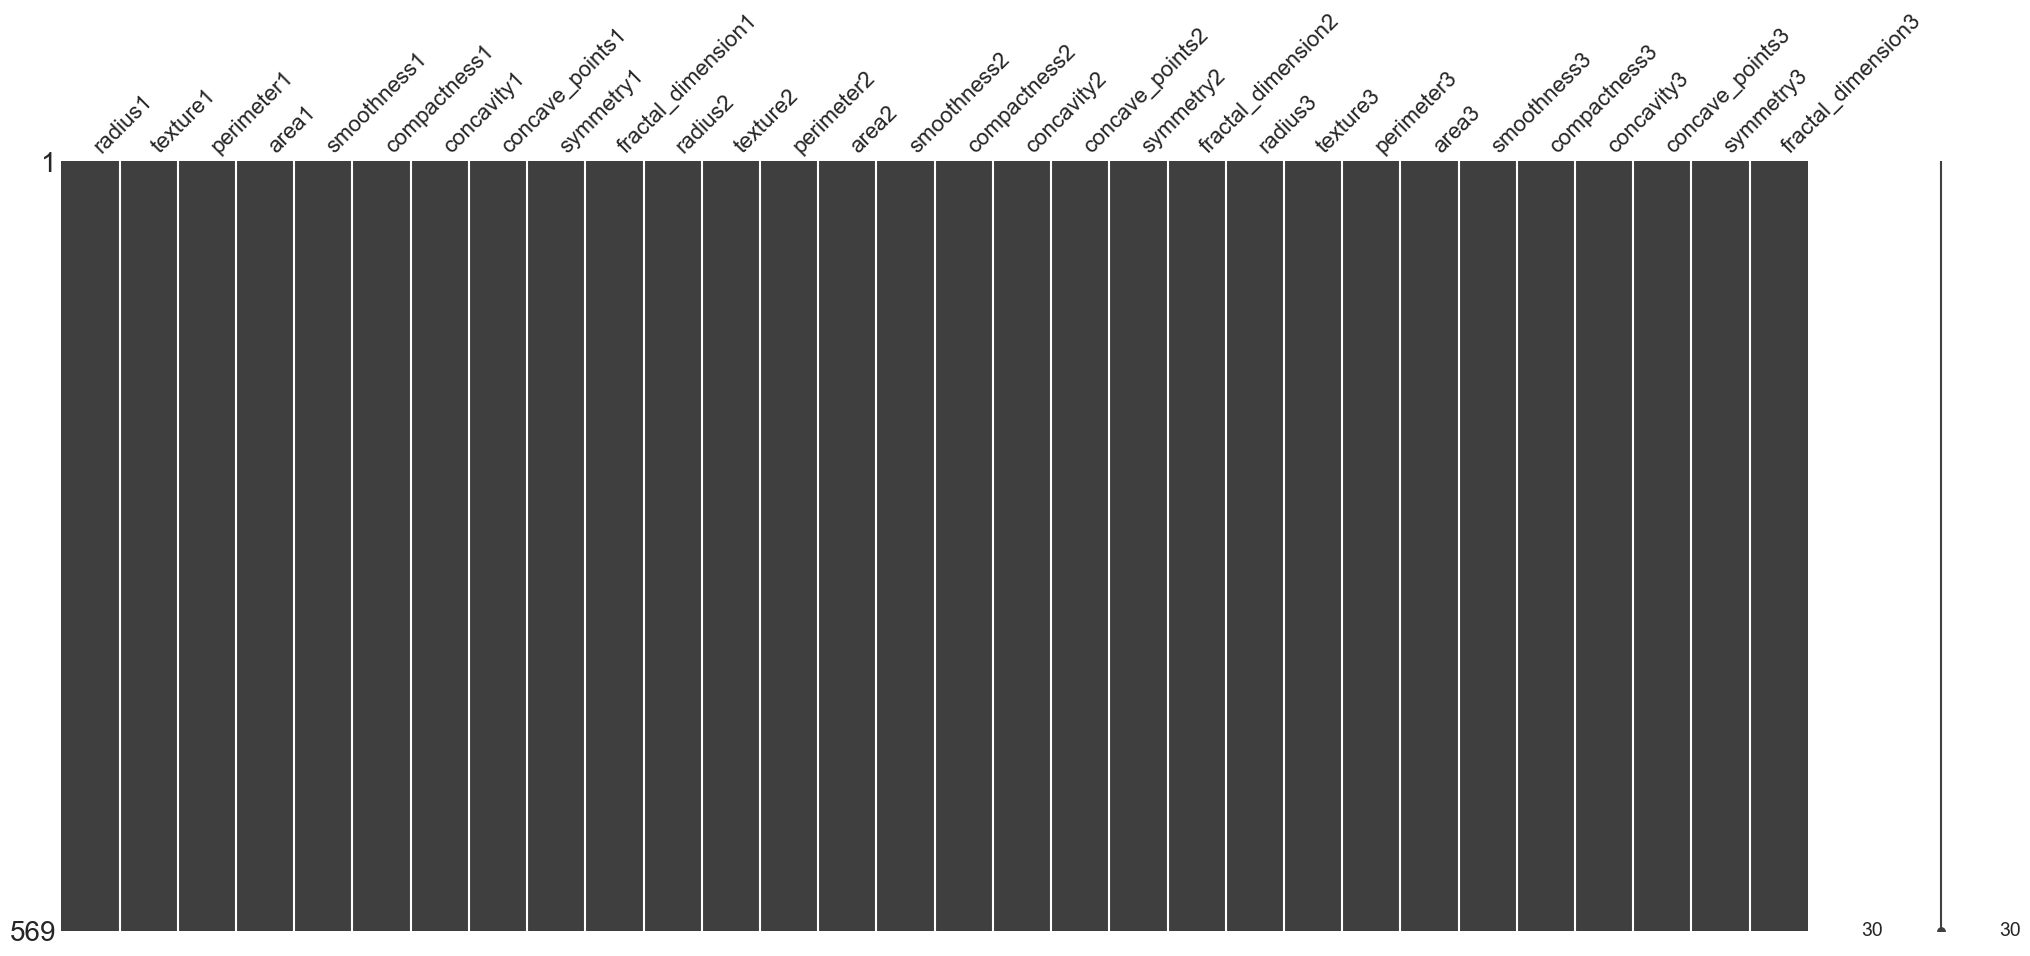

In [6]:
msno.matrix(breast_cancer_wisconsin_diagnostic.data.features)

Checking the number of elements for each class:

Our dataset is split in two dataframes: one that contains independent features (`breast_cancer_wisconsin_diagnostic.data.features`- we renamed it `X` earlier) and one that contains our dependent variable (`breast_cancer_wisconsin_diagnostic.data.targets`- we renamed it `y` earlier) i.e the type/class of cell the data point corresponds to (tumorous i.e malignant cell represented by the value "M" in the dataframe or healthy cell i.e benign tissue cell represented by value "B" in the dataframe).
We take a closer look at the dependent variable and try to determine how many elements of each class we have in our dataset.
To do this, we first transform our dependent variable into list and flatten it to get a list of class elements (using the function `chain` from the `itertools` library). Then we use the `Counter` function from `collections` library to the number of values of each class and print out the result.

In [8]:
target_values=breast_cancer_wisconsin_diagnostic.data.targets.values.tolist()
target_values=list(chain(*target_values))
counts=Counter(target_values)
for k in counts.keys():
    print("---------------------------\ntarget value:", k, '\nnumber of elements for target value',k,":",counts[k],'\nproportion in data:',counts[k]/len(target_values))

---------------------------
target value: M 
number of elements for target value M : 212 
proportion in data: 0.37258347978910367
---------------------------
target value: B 
number of elements for target value B : 357 
proportion in data: 0.6274165202108963


Our data is what we call imbalanced, since there are much more samples from one class than from another. There are almost twice as many samples from the "B" class ("majority class") than there are from the "M" class ("minority class"). This means that evaluating our models with the accuracy metric is not going to be accurate. We need to either choose a different metric than accuracy (not the solution chosen in this class) or resample the data (undersample/downsample it i.e reduce the number of data points from the majority class or oversample it i.e increase the number of samples from the minority class). Downsampling is not recommended unless you have massive amounts of data (if you reduce your majority class data points to try and fit the proportion of minority class points present in your dataset, you might not be left with much data at all to analyse!). So, in practice, you tend to oversample and one of the most common methods for this is called SMOTE (check <span style="color:blue">(Chawla et al. 2002)</span> for details). This is the method we are using here.

In [10]:
oversample=SMOTE()
X,y=oversample.fit_resample(breast_cancer_wisconsin_diagnostic.data.features,breast_cancer_wisconsin_diagnostic.data.targets) #explanation: this is to generate sample to overcome imbalanced data issue

We check the number of values per class after performing oversampling with SMOTE.

In [11]:
target_values=y.values.tolist()
target_values=list(chain(*target_values))
counts=Counter(target_values)
for k in counts.keys():
  print("---------------------------\ntarget value:", k, '\nnumber of elements for target value',k,":",counts[k],'\nproportion in data:',counts[k]/len(target_values))

---------------------------
target value: M 
number of elements for target value M : 357 
proportion in data: 0.5
---------------------------
target value: B 
number of elements for target value B : 357 
proportion in data: 0.5


As expected, we now have the same number of elements in each class. We can proceed.

To draw our heatmap, we concatenate both independent and dependent variables in one single dataframe called `data`.

In [12]:
data=pd.concat([X,y],axis=1)

print(data.columns)

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')


As usual, we draw the correlation heatmap between our variable to check for high correlations between our variables and reduce the set of input variables we provide to our models.

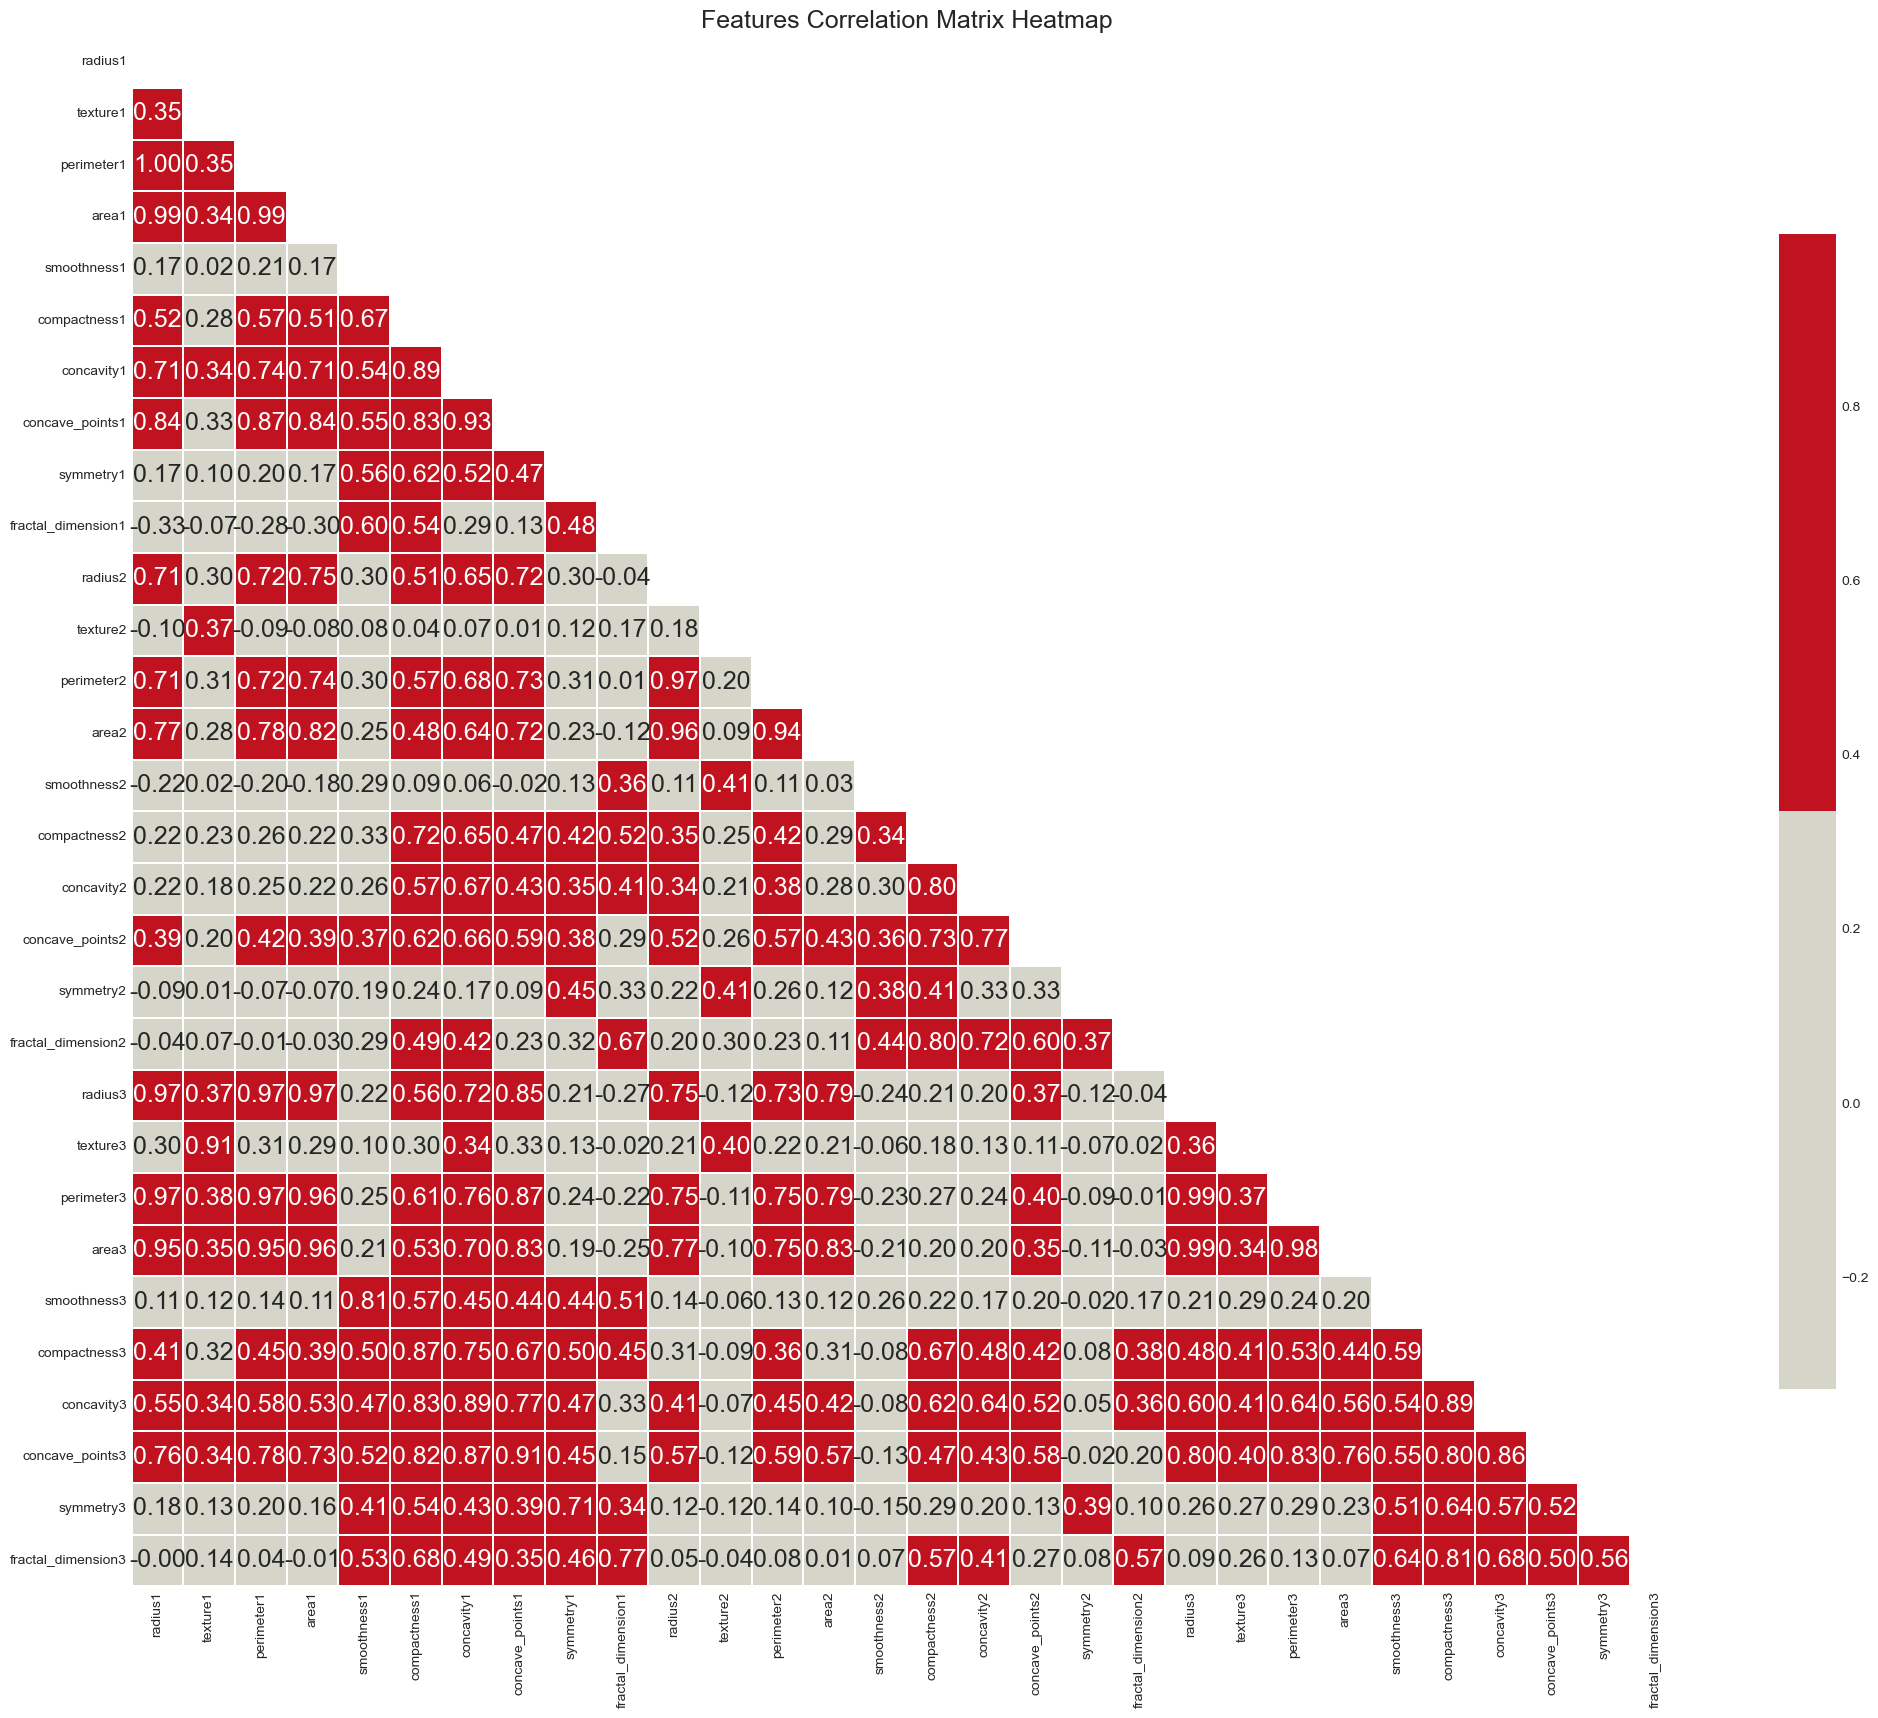

In [13]:

plt.figure(figsize=(25,25))

heatmap_colors = [colors[1], '#d6d5c9', colors[0]]

corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data.corr(numeric_only=True),
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=heatmap_colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

plt.title('Features Correlation Matrix Heatmap', fontsize=18);
plt.savefig("corr_heatmap_breast_cancer.png")

Looking at the heatmap, we can immediately see that some of our variables are highly correlated. 
For example, `radius1` column has a correlation of 1 and 0.99 with `perimeter1` and `area1` respectively: this is most likely because the three variables essentially encode the same information, which is the physical size of the observation (the cell). Therefore, we should only choose one of the three variables for our analysis.

Another area where high correlations (i.e multicollinearity) is visible is between the variables tagged with index 1 and the variables tagged with index 3. For instance, the `radius1` column has a correlation of 0.97 with `radius3`. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its variables tagged with index 1 and variables tagged with index 3. We should discard the variables tagged with index 3 in our ulterior analysis.

In short, we will drop all columns tagged with index 3 from our dataset, and only choose one of the three attributes (i.e one of perimeter, area or radius) that describe the size of cells. But which one should be pick?

Let's quickly review some geometry. If we think of a cell as roughly taking a form of a circle, then the formula for its radius is, well, its radius, r. The formulae for its perimeter and area are then 2𝜋𝑟
and 𝜋𝑟2, respectively. As we can see, a cell's radius is the basic building block of its size. Therefore, it is probably reasonable to choose radius as our attribute to represent the size of a cell.

Similarly, it looks as if like there is multicollinearity between the attributes compactness, concavity, and concave points. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell. Compactness looks relatively straightforward, so we will remove the other two attributes.

We will now go head and drop all unnecessary columns.

In [15]:
cleaned_data=data[['Diagnosis', 'radius1', 'texture1', 'smoothness1',
       'compactness1', 'symmetry1', 'fractal_dimension1',
       'radius2', 'texture2', 'smoothness2', 'compactness2',
       'symmetry2', 'fractal_dimension2']]

We once again draw the heatmap for this reduced, cleaned up dataset to verify that there is no multicollinearity.

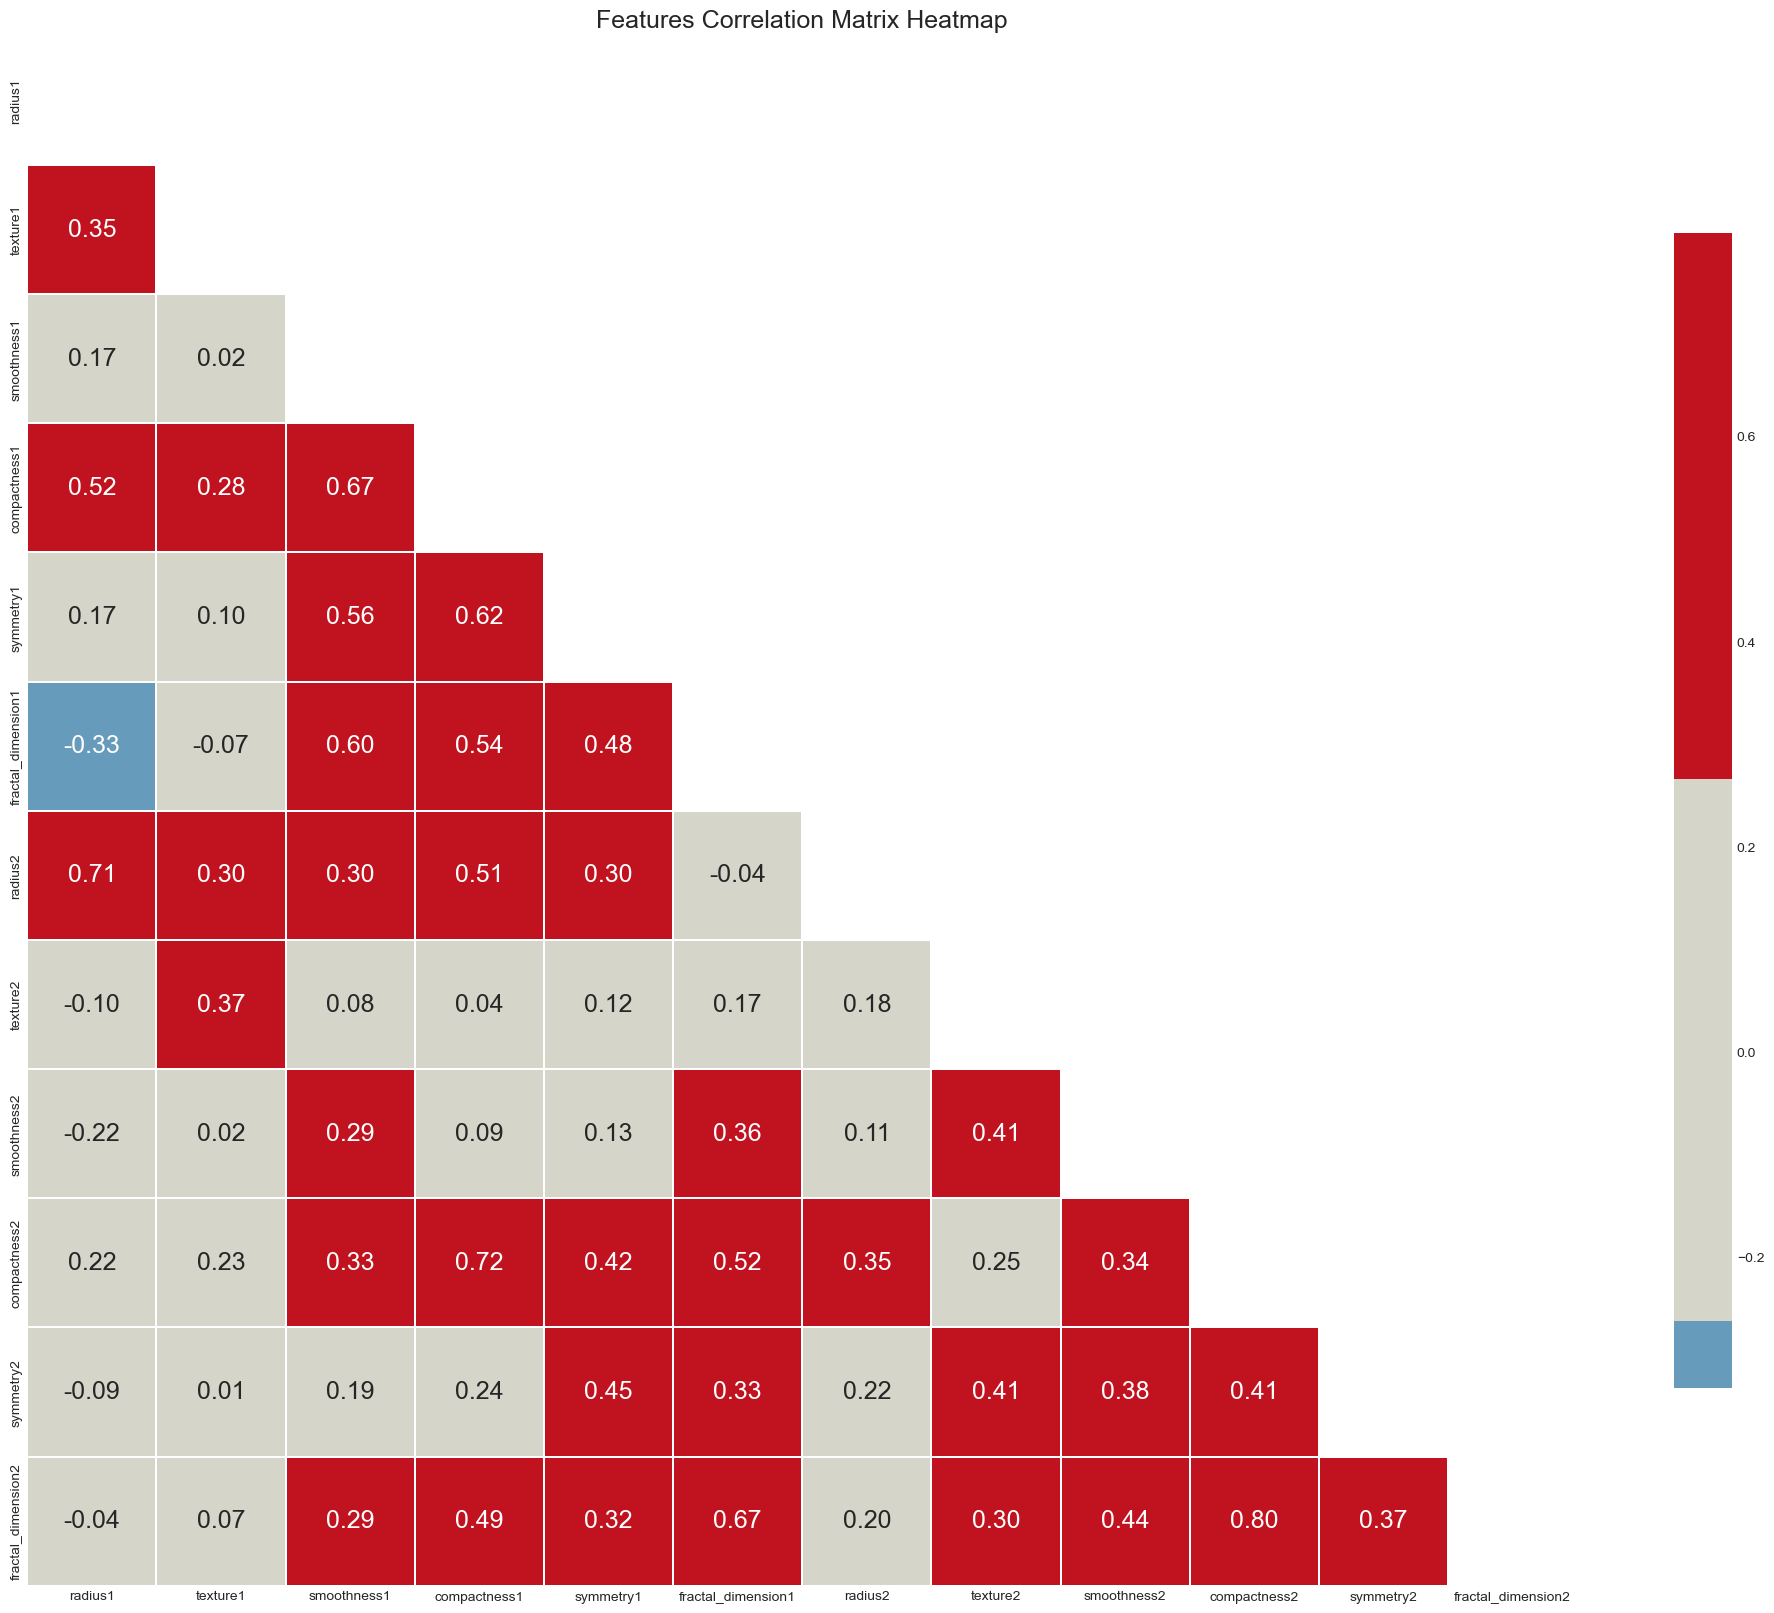

In [16]:
plt.figure(figsize=(25,25))

heatmap_colors = [colors[1], '#d6d5c9', colors[0]]

corr = cleaned_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(cleaned_data.corr(numeric_only=True),
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=heatmap_colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

plt.title('Features Correlation Matrix Heatmap', fontsize=18);
plt.savefig("corr_heatmap_breast_cancer.png")

We split our dataset into training set (70% of our data points) and test set (30% of our data points).

In [19]:
# Split the data into training and testing sets

X = cleaned_data
y = cleaned_data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
y_train

28     M
43     M
42     M
73     M
167    M
      ..
71     B
106    B
270    B
435    M
102    B
Name: Diagnosis, Length: 499, dtype: object

In [20]:
# Logistic Regression Model

# Create a string for the formula
cols = cleaned_data.columns.drop('Diagnosis')
formula = 'Diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

Diagnosis ~ radius1 + texture1 + smoothness1 + compactness1 + symmetry1 + fractal_dimension1 + radius2 + texture2 + smoothness2 + compactness2 + symmetry2 + fractal_dimension2 



In [21]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['Diagnosis[B]', 'Diagnosis[M]']   No. Observations:                  499
Model:                                          GLM   Df Residuals:                      486
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -57.650
Date:                              Tue, 14 Nov 2023   Deviance:                       115.30
Time:                                      22:38:37   Pearson chi2:                     215.
No. Iterations:                                   9   Pseudo R-squ. (CS):             0.6849
Covariance Type:                          nonrobust                                         
                         coef    std err          z      P>|z|      [0

In [22]:
# predict the test data and show the first 10 predictions
predictions = logistic_fit.predict(X_test)
predictions[0:10]

120    9.999328e-01
329    6.327019e-03
39     3.599910e-01
294    9.962542e-01
654    2.188153e-09
436    8.605641e-01
65     2.323497e-03
617    6.382275e-05
78     7.649290e-11
652    4.284286e-07
dtype: float64

In [23]:
# Note how the values are numerical.
# Convert these probabilities into nominal values and check the first 10 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[0:10]

['B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M']

In [24]:
# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, predictions_nominal)
logistic_accuracy

0.9348837209302325

The accuracy score for our logistic regression classifier is rather high. Let's now test another classifier, i.e decision trees, and compare its performance to logistic regression.

Before we are able to do that, we need to encode our target variable (within training and test set), i.e dependent variable, into numerical values so that "M" become 0 and "B" become 1.

In [25]:
# # Converting target variable into numerical values
# # This assigns a unique numerical value to each category
# To avoid confusion, define your custom encoding mapping
custom_encoding = {
    'M': 0,
    'B': 1
}

# Use a list comprehension to apply the custom encoding
y_train_encoded = [custom_encoding[label] for label in y_train]
y_test_encoded = [custom_encoding[label] for label in y_test]

#y_train_encoded

#Let's get the predictions from our logistic regression model encoded (we'll need that for comparisons with other models later)

encoded_logistic_predictions=[custom_encoding[e] for e in predictions_nominal]
encoded_logistic_predictions[0:10] #showing the first 10 predictions (encoded)

[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [26]:
# To check your encoding
# Create a dictionary to store the mapping
encoding_mapping = {label: var for label, var in zip(y_train, y_train_encoded)}

# Print the mapping
for label, var in encoding_mapping.items():
    print(f"{label} corresponds to {var}")

M corresponds to 0
B corresponds to 1


In [27]:
# Split the data into training and testing sets (this time by dropping target column)
X = cleaned_data.drop(columns=['Diagnosis'])
y = cleaned_data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [28]:
# Decision Tree classification


# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, y_train_encoded)

# We predict target values
y_dt_predict = dtcla.predict(X_test)

print("first 10 predictions for decision tree model", y_dt_predict[0:10].tolist() ) #showing the first ten predictions

#how does that compare to logistic regression

print("first 10 predictions for logistic model",encoded_logistic_predictions[0:10])

first 10 predictions for decision tree model [1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
first 10 predictions for logistic model [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]


We see some differences in both models' predictions.

In [31]:

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_dt_predict)
accuracy

0.48372093023255813

The decision tree accuracy is much lower than the regression model's. So far, the model of choice is logistic regression. Can SVM do better?

In [30]:
# SVM (Support Vector Machine) classification


# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10, kernel='rbf',random_state=9, probability=True), n_jobs=-1))

# We train model
svmcla.fit(X_train, y_train_encoded)

# We predict target values
y_svm_predict = svmcla.predict(X_test)


print("first 10 predictions for SVM model", y_svm_predict[0:10].tolist() ) #showing the first ten predictions

# how does it compare to the other two models

print("first 10 predictions for decision tree model", y_dt_predict[0:10].tolist() ) #showing the first ten predictions

print("first 10 predictions for logistic model",encoded_logistic_predictions[0:10])

first 10 predictions for SVM model [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
first 10 predictions for decision tree model [1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
first 10 predictions for logistic model [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]


Again, our model's first ten predictions diverge and the SVM accuracy score is still lower than the logistic regression's score and even even lower than the decision trees'. Our winner model (based on accuracy alone) is logistic regression.

In [31]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_test_encoded, y_svm_predict)
svm_accuracy

0.4790697674418605

In [34]:
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10, kernel='sigmoid',random_state=9, probability=True), n_jobs=-1))

# We train model
svmcla.fit(X_train, y_train_encoded)

# We predict target values
y_svm_predict = svmcla.predict(X_test)


print("first 10 predictions for SVM model", y_svm_predict[0:10].tolist() ) #showing the first ten predictions

# how does it compare to the other two models

print("first 10 predictions for decision tree model", y_dt_predict[0:10].tolist() ) #showing the first ten predictions

print("first 10 predictions for logistic model",encoded_logistic_predictions[0:10])
svm_accuracy = accuracy_score(y_test_encoded, y_svm_predict)
svm_accuracy

first 10 predictions for SVM model [0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
first 10 predictions for decision tree model [0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
first 10 predictions for logistic model [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]


0.5069767441860465

**References**<br/>

Chawla, N. V., K. W. Bowyer, L. O. Hall, and W. P. Kegelmeyer. 2002. “SMOTE: Synthetic Minority over-Sampling Technique.” *Journal of Artificial Intelligence Research* 16 (June): 321–57. https://doi.org/10.1613/jair.953.